---
Código para análise de dados do Experimento 1 de Laboratório de Física I

Feito pelo aluno

 Vinícius dos Passos de Souza

---



**Código para cálculo de MMQ($x$,$y$,$\sigma_y$)**

In [60]:
import numpy as np
def MMQ(x,y,ey):
  #SOMA Y/ERRO^2
  s1=0
  #SOMA X/ERRO^2
  s2=0
  #SOMA 1/ERRO^2
  s3=0
  #SOMA X*Y/ERRO^2
  s4=0
  #SOMA X^2/ERRO^2
  s5=0
  for i in range(len(y)):
      s1= (y[i])/((ey[i])**2)+s1
      s2 = (x[i])/((ey[i])**2)+s2
      s3= 1/((ey[i])**2)+s3
      s4= (x[i]*y[i])/((ey[i])**2)+s4
      s5 = ((x[i])**2)/((ey[i])**2)+s5
  v=(len(y))/s3
  v1=s5/s3
  v2=s2/s3
  a = (s1*s2-s3*s4)/(s2**2-s5*s3)

  return [a,(v/((v1-v2**2)*len(y)))**0.5, 
   (s1-a*s2)/(s3),(v*v1/((v1-v2**2)*len(y)))**0.5]
#Devolve lista com (coef. angular, erro coef. angular, coef linear, erro coef linear)

Teste de função para cálculo de MMQ, se temos reta com coeficiente angular 1 e coeficiente linear 0, com pontos (0,0),(1,1),(2,2),(3,3),(4,4) e (5,5) obtemos com esse MMQ.


In [61]:
x = [0,1,2,3,4,5]
y=[0,1,2,3,4,5]
ey = np.ones(len(y))
s = MMQ(x,y,ey)
print(f'Reta: y=({s[0]}+-{round(s[1],1)})x+({s[2]}+-{round(s[3],1)})')

Reta: y=(1.0+-0.2)x+(0.0+-0.7)


Código devolveu reta com mesmo coeficiente angular e linear, com incerteza relativamente próxima

**Adicionar os 
[DADOS](https://docs.google.com/spreadsheets/d/1CLpfpYSdI0fd9WszVqevz2mIBTUWz9jL9UcDiVNRv7E/edit?usp=sharing)**

Baixar essa planilha e adicionar para esse programa ler

In [62]:
#ADicionar excel aqui e ler ele
import pandas as pd
excel = pd.ExcelFile('LAb1_EXP1.xlsx')

data = pd.read_excel(excel,'TABELAS')

In [63]:
#Colocar os dados nas listas
import numpy as np
x = np.array(data['x (m)'].values)
ex = np.array(data['e_x'].values)

#medidas de t^2
t=[[],[],[],[],[],[]]
#erros de t^2
et=[[],[],[],[],[],[]]
#Puxando dados do excel para o programa
for i in range(len(t)):
  t[i]=data[f't{i+1}'].values
  et[i] = data[f'et{i+1}'].values


**Cacular coeficientes da reta feita de $x=at^2+b$**

In [64]:
#Lista com coeficientes a, ea, b ,eb
c=[[],[],[],[],[],[]]

for i in range(0,len(t)):
  c[i]=MMQ(t[i],x,ex)
  print(f'Reta {i}: x = ({c[i][0]}+-{c[i][1]})t^2+({c[i][2]}+-{c[i][3]})')

Reta 0: x = (0.08487254806316866+-9.674402181530589e-05)t^2+(-0.0018061006678358426+-0.0004120337237737367)
Reta 1: x = (0.43079745983217477+-0.0004910428494025158)t^2+(-5.7657472339862326e-05+-0.0004105903078920447)
Reta 2: x = (0.7829620985423669+-0.0008924769955891542)t^2+(0.0018893278308927924+-0.0004089992053462355)
Reta 3: x = (1.1254103119304386+-0.001282867570769242)t^2+(0.0027068604873892606+-0.0004083378491661421)
Reta 4: x = (0.5684759938786826+-0.0006480392466615417)t^2+(0.0035679033862271647+-0.0004076436951356156)
Reta 5: x = (0.2569058604339045+-0.00029283497011787325)t^2+(0.0007702279764336229+-0.0004099122733686874)


**Plotar gráfico de $x$ $(m)$ VS $t^2$ $(s^2)$**

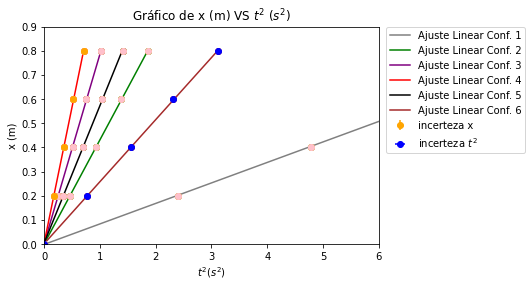

In [65]:
import matplotlib.pyplot as plt

col = ['gray','green','purple','red','black','brown']

for i in range(len(t)):
  #plot dos pontos
  plt.plot(t[i],x,'o',color = col[i])
  #plot das retas
  plt.plot(t[i],t[i]*c[i][0]+c[i][2],'-',color = col[i],label = f'Ajuste Linear Conf. {i+1}')

#plot errorbar
for i in range(len(t)-1):
  plt.errorbar(t[i],x,yerr = ex,fmt='o',color = 'orange')
  plt.errorbar(t[i],x,xerr=et[i],fmt='o',color ='pink')
#colcoar legenda da error bar
plt.errorbar(t[i-1],x,yerr = ex,fmt='o',color = 'orange',label = 'incerteza x')
plt.errorbar(t[-+1],x,xerr=et[i+1],fmt='o',color = 'blue',label = 'incerteza $t^2$')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#tirar se n quiser legenda
plt.ylim([0,0.9]) #arruma tamanho eixo y
plt.xlim([0,6]) #arrumar tamanho eixo x
plt.title('Gráfico de x (m) VS $t^2$ $(s^2)$')
plt.xlabel('$t^2$($s^2$)')
plt.ylabel('x (m)')
plt.show()

**Adicionar Massa do corpo suspenso $m$ e do total $M_T$**

In [66]:
#TODAS AS MASSAS EM g
m=5.26 #massa original do corpo suspenso
em=0.01 #erro da massa original do corpo suspenso

Mt=286.37 #massa total dos 2 corpos
eMt=0.02 #erro da massa total dos 2 corpos

u=10.01 #massa adicionada ao corpo suspenso
eu=0.01 #incerteza da massa adicionado ao corpo suspenso

**Obter massas suspensas e acelerações calculadas com modelo teórico**

$a = \frac{mg}{2M_t}$

In [67]:
#massa corpo suspenso no decorrer dos setups
mh= np.array([5.26,(5.26+2*u),(5.26+4*u),(5.26+6*u),(5.26+3*u),(5.26+1*u)])
emh = np.array([0.01,(np.sqrt(0.01**2+(2*0.01)**2)),(np.sqrt(0.01**2+(4*0.01)**2)),(np.sqrt(0.01**2+(6*0.01)**2)),
                (np.sqrt(0.01**2+(3*0.01)**2)),(np.sqrt(0.01**2+(0.01)**2))])

#aceleração calculada com modelo teórico
for i in range(len(t)):
  print(f'a_{i} = \({mh[i]*9.8/(2*Mt)}\pm {9.8/2*np.sqrt(emh[i]**2/Mt**2+mh[i]**2*eMt**2/Mt**4)}\)')

a_0 = \(0.09000244439012467\pm 0.0001712227254013524\)
a_1 = \(0.43255927646052317\pm 0.0003837983697083931\)
a_2 = \(0.7751161085309215\pm 0.0007075673584716418\)
a_3 = \(1.1176729406013202\pm 0.001043728104558374\)
a_4 = \(0.6038376924957224\pm 0.0005427297451511508\)
a_5 = \(0.2612808604253239\pm 0.00024266933001823343\)


---
---
---
**Associação com Gravidade**

PAra isso tentarei plotar um gráfico no formato $a=C\frac{m}{Mt}$ (o $C$ deve dar metade da gravidade).

In [68]:
#acelerações
a=np.ones(len(t))
ea=np.ones(len(t))

for i in range(len(t)):
  a[i]=c[i][0]
  ea[i]=c[i][1]
  #print(f'\({a[i]} \pm {ea[i]}\) ') #para ver tabela
print('-')
#G seria os valores de mh/Mt
G = np.ones(len(t))
eG = np.ones(len(t))
for i in range(len(t)):
  G[i]=mh[i]/Mt
  eG[i] = np.sqrt( (emh[i]/Mt)**2 + (eMt*mh[i]/(Mt**2))**2 )
  #print(f'\( {G[i]}\pm{eG[i]}\)') #printe se quiser fazer tabela 

#MMQ
J = MMQ(G,a,ea)
print(f'C=({J[0]}+- {J[1]})')
print(f'0={J[2]}+-{J[3]}')
print(f'g = ({J[0]*2}+- {J[1]*(2)})m/s^2')

-
C=(4.87892873045968+- 0.003167738043551582)
0=-0.004733116933939242+-0.00012598291600556845
g = (9.75785746091936+- 0.006335476087103164)m/s^2


**Plotar o gráfico de $a$ por $\frac{m}{Mt}$**

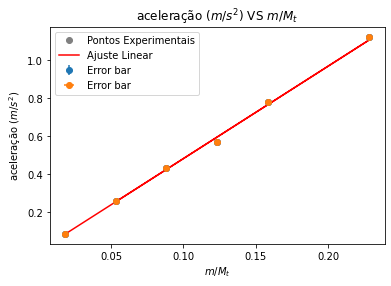

In [69]:
plt.plot(G,a,'o',color = 'gray',label = 'Pontos Experimentais')
plt.plot(G,G*J[0]+J[2],'-',color = 'red', label = 'Ajuste Linear')

plt.errorbar(G, a,yerr=ea,fmt='o', label = 'Error bar')
plt.errorbar(G, a, xerr=eG,fmt='o', label = 'Error bar')        


#plt.ylim([0,0.75])
#plt.xlim([-0.0005,0.0708])
plt.legend()
plt.title('aceleração ($ m/s^2$) VS $m/M_t$ ')
plt.ylabel('aceleração ($m/s^2$)')
plt.xlabel('$ m/M_t$')
plt.show()

---
---
---
**Calcular forças e Acelerações**

Erro da força calculado usando propagação de Erro
$\sigma_F = \pm g\sqrt{\sigma_m^2 + \left( \sigma_{added mass}\right)^2 }$

In [70]:
g=9.8

#definindo forças
F= mh*g*10**(-3)
eF= emh*g*10**(-3)


print(f'F = {F}+-')
print(f'sigma_F = {eF}')
print(f'a(m/s^2) = {a}')
print(f'sigma_a = {ea}')

F = [0.051548 0.247744 0.44394  0.640136 0.345842 0.149646]+-
sigma_F = [9.80000000e-05 2.19134662e-04 4.04064351e-04 5.96110728e-04
 3.09903211e-04 1.38592929e-04]
a(m/s^2) = [0.08487255 0.43079746 0.7829621  1.12541031 0.56847599 0.25690586]
sigma_a = [9.67440218e-05 4.91042849e-04 8.92476996e-04 1.28286757e-03
 6.48039247e-04 2.92834970e-04]


**Conseguir Reta(MMQ)**

In [71]:
C = MMQ(a,F,eF)
print(f'Reta: F = ({C[0]}+- {C[1]})a + ({C[2]} +-{C[3]})')
print(f'Massa total = {C[0]/2}+-{C[1]/2}')

Reta: F = (0.5737691387483382+- 0.0003451914050816803)a + (0.002963416496691777 +-0.000106624493334986)
Massa total = 0.2868845693741691+-0.00017259570254084014


**Plotar Gráfico de $F$ $(N)$ VS $a$ $ \left (\frac{m}{s^2} \right )$**

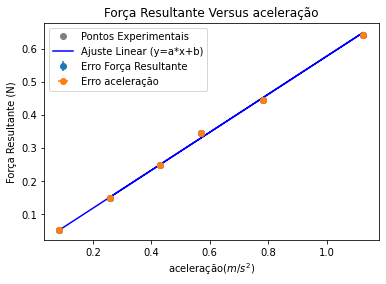

In [72]:
plt.plot(a,F,'o',color = 'gray')
plt.plot(a,a*C[0]+C[2],'-',color = 'blue')

plt.errorbar(a, F, yerr=eF,fmt='o')
plt.errorbar(a, F, xerr=ea,fmt='o')        
plt.legend(['Pontos Experimentais','Ajuste Linear (y=a*x+b)','Erro Força Resultante','Erro aceleração'])

#plt.ylim([0,0.75])
#plt.xlim([-0.0005,0.0708])
plt.title('Força Resultante Versus aceleração')
plt.xlabel('aceleração($m/s^2$)')
plt.ylabel('Força Resultante (N)')
plt.show()

---
---
---
---
---

**Plot gráfico do apendice**

Reta 0: x = (0.09210964861412632+-0.00010498897929526086)t^2+(0.000977417441587894+-0.00040973737837227944)
Reta 1: x = (0.11247509054904962+-0.0001282036106845909)t^2+(0.0013998491624218363+-0.0004093938775867594)
Reta 2: x = (0.15748821028141707+-0.00017951223147885678)t^2+(0.0019835125316613623+-0.0004089171532221122)
Reta 3: x = (0.24434949465028527+-0.00027852821856530637)t^2+(0.00250684053371148+-0.00040849492841081906)
Reta 4: x = (0.46746552135031794+-0.000532868644871894)t^2+(0.0033735840948149226+-0.0004077932907905035)


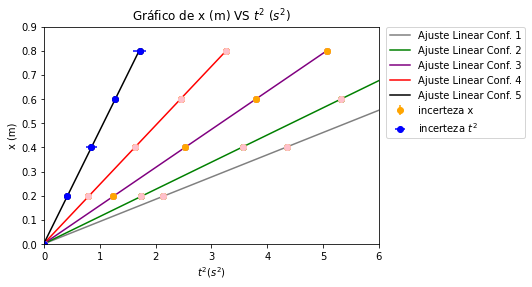

In [73]:
excel =pd.ExcelFile('Copia de LAb1_EXP1.xlsx')
data = pd.read_excel(excel,'TABELAS')
#Colocar os dados nas listas
import numpy as np
x = np.array(data['x (m)'].values)
ex = np.array(data['e_x'].values)

#medidas de t^2
t=[[],[],[],[],[]]
#erros de t^2
et=[[],[],[],[],[]]
#Puxando dados do excel para o programa
for i in range(len(t)):
  t[i]=data[f't{i+1}'].values
  et[i] = data[f'et{i+1}'].values
#Lista com coeficientes a, ea, b ,eb
o=[[],[],[],[],[],[]]

for i in range(0,len(t)):
  o[i]=MMQ(t[i],x,ex)
  print(f'Reta {i}: x = ({o[i][0]}+-{o[i][1]})t^2+({o[i][2]}+-{o[i][3]})')

col = ['gray','green','purple','red','black','brown']

for i in range(len(t)):
  #plot dos pontos
  plt.plot(t[i],x,'o',color = col[i])
  #plot das retas
  plt.plot(t[i],t[i]*o[i][0]+o[i][2],'-',color = col[i],label = f'Ajuste Linear Conf. {i+1}')

#plot errorbar
for i in range(len(t)-1):
  plt.errorbar(t[i],x,yerr = ex,fmt='o',color = 'orange')
  plt.errorbar(t[i],x,xerr=et[i],fmt='o',color ='pink')
#colcoar legenda da error bar
plt.errorbar(t[i-1],x,yerr = ex,fmt='o',color = 'orange',label = 'incerteza x')
plt.errorbar(t[-+1],x,xerr=et[i+1],fmt='o',color = 'blue',label = 'incerteza $t^2$')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)#tirar se n quiser legenda
plt.ylim([0,0.9]) #arruma tamanho eixo y
plt.xlim([0,6]) #arrumar tamanho eixo x
plt.title('Gráfico de x (m) VS $t^2$ $(s^2)$')
plt.xlabel('$t^2$($s^2$)')
plt.ylabel('x (m)')
plt.show()